In [21]:
import pandas as pd
import numpy as np

In [22]:
df = pd.read_excel('SampleClientData.xlsx', sheet_name='OrderQuantities')
regions = pd.read_excel('SampleClientData.xlsx', sheet_name='Regions')

## Look at the Dataframe

In [23]:
df

,Customer ID,Date,Vol
0,C38,2020-03-31,884.0
1,NaN,2020-04-30,886.0
2,NaN,2020-05-31,968.0
3,NaN,2020-06-30,564.0
4,NaN,2020-07-31,648.0
...,...,...,...
902,NaN,2021-05-31,290.0
903,NaN,2021-04-30,294.0
904,NaN,2021-03-31,270.0
905,NaN,2021-02-28,224.0


In [24]:
df.describe()

,Vol
count,907.000000
mean,5376.309813
std,8551.586979
min,26.000000
25%,568.500000
50%,1173.000000
75%,5284.500000
max,41598.000000


## Filling in missing Customer IDs

In [25]:
df['Customer ID'].fillna(method='ffill', inplace=True)

## Look at the Regions

In [28]:
regions.head()

,Customer ID,Region
0,C1,NAM
1,C2,NAM
2,C3,EMEA
3,C4,NAM
4,C5,EMEA


### Get the Region in the df

In [31]:
# Create a dictionary and map to CLID in df
region_dict = regions.copy()
region_dict.index = regions['Customer ID']
region_dict = region_dict['Region'].to_dict()


In [32]:
df['Region'] = df['Customer ID'].map(region_dict)
# df
df['Region'].value_counts()

NAM      343
APAC     241
LATAM    180
EMEA     143
Name: Region, dtype: int64

## Look at the dates to see Q2 of this year

In [26]:
df['Date'].min()

Timestamp('2020-01-31 00:00:00')

In [27]:
df['Date'].max()

Timestamp('2021-06-30 00:00:00')

In [29]:
df['Year'] = df['Date'].dt.year
df['Quarter'] = df['Date'].dt.quarter

df['YearQuarter'] = df['Year'].astype(str) + '_' + df['Quarter'].astype(str)

In [30]:
df.head()

,Customer ID,Date,Vol,Year,Quarter,YearQuarter
0,C38,2020-03-31,884.0,2020,1,2020_1
1,C38,2020-04-30,886.0,2020,2,2020_2
2,C38,2020-05-31,968.0,2020,2,2020_2
3,C38,2020-06-30,564.0,2020,2,2020_2
4,C38,2020-07-31,648.0,2020,3,2020_3


In [33]:
# Filter data frame just to include Q2
q2 = df[df['YearQuarter']=='2021_2']
q2

,Customer ID,Date,Vol,Year,Quarter,YearQuarter,Region
10,C38,2021-06-30,561.0,2021,2,2021_2,LATAM
11,C38,2021-05-31,1014.0,2021,2,2021_2,LATAM
12,C38,2021-04-30,878.0,2021,2,2021_2,LATAM
28,C29,2021-06-30,846.0,2021,2,2021_2,NAM
29,C29,2021-05-31,1553.0,2021,2,2021_2,NAM
...,...,...,...,...,...,...,...
870,C2,2021-05-31,38501.0,2021,2,2021_2,NAM
871,C2,2021-04-30,33923.0,2021,2,2021_2,NAM
901,C49,2021-06-30,195.0,2021,2,2021_2,APAC
902,C49,2021-05-31,290.0,2021,2,2021_2,APAC


## Which region has the most volume?

In [34]:
# Which region has the most volume?
# Group by region
q2vol = q2.groupby(['Region'])['Vol'].sum()
q2vol

Region
APAC     109811.0
EMEA     176338.0
LATAM     82631.0
NAM      596502.0
Name: Vol, dtype: float64

<AxesSubplot:xlabel='Region'>

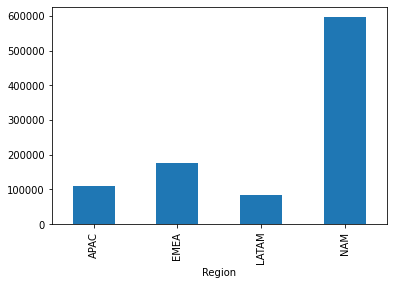

In [35]:
# Plot the Region volumes for Q2
q2vol.plot.bar()